# Return Maps of Filament Dynamics

Plots comparing 1D return maps generated from single-cycle dynamics and full numerical simulations

In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure4'

import _figure_parameters

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

## Load the simulation Return Map data

:warning: Requires preprocessing of raw simulation data.

To run the preprocessing, run the notebook

```
/processing/Filament_ReturnMaps_processing.ipynb
```

In [31]:

processed_data = '/home/deepak/Dropbox/LacryModeling/processed_data/ReturnMap_BaseTipAngle'

# processed_data = '/home/deepak/Dropbox/LacryModeling/processed_data/ReturnMap_BaseTipAngle/activityTime_sweep'

analysis_type = 'ReturnMap_BaseTipAngle'
parameter = 'potDipole strength'
parameter_values_to_plot = [1.526, 1.654, 2.29, 2.744]


# parameter = 'activity timescale'
# parameter_values_to_plot = [650, 750, 900]


In [32]:
# Collate the dataFrames
df_ensemble = pd.DataFrame({})


for root, dirs, files in os.walk(processed_data):
       
    for file in files:
            
        if(analysis_type in file and file.endswith('.csv')):
            
            df = pd.read_csv(os.path.join(root, file))
            
            df_metadata = pd.read_csv(os.path.join(root, 'metadata.csv'))
            
            parameter_value = df_metadata[parameter][0]
            
            if(np.any(abs(parameter_value - parameter_values_to_plot)<=0.1)):

                base_tip_0 = np.array(df['Base-Tip angle'])[:-1]
                base_tip_1 = np.array(df['Base-Tip angle'][1:])



                df_ensemble = df_ensemble.append(pd.DataFrame({'Base-Tip angle (n)':base_tip_0, 
                                                           'Base-Tip angle (n+1)':base_tip_1, 
                                                           parameter:np.repeat(parameter_value, len(base_tip_0))}))
            
        

In [33]:
parameter_values = np.unique(df_ensemble[parameter])

print(parameter_values)

[1.5        1.52564103 1.65384615 2.29487179 2.74358974]


## Load Single-cycle Return map Data

In [6]:
# Load the single-cycle prediction data
analysis_type = 'buckling_escape_angles'

# Activity strength sweep
# single_cycle_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL'

# Activity time-sweep
single_cycle_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/ActivityTimeSweep_FINAL'

df_ensemble_predicted = pd.DataFrame({})

for root, dirs, files in os.walk(single_cycle_folder):
    
    for file in files:
        if(analysis_type in file and file.endswith('.csv')):
            print(file)

            df = pd.read_csv(os.path.join(root, file))
            
            df_ensemble_predicted = df_ensemble_predicted.append(df)
            
            
            
            
            
            

            

        


buckling_escape_angles_650.0_1.5.csv
buckling_escape_angles_575.0_1.5.csv
buckling_escape_angles_675.0_1.5.csv
buckling_escape_angles_750.0_1.5.csv
buckling_escape_angles_700.0_1.5.csv
buckling_escape_angles_625.0_1.5.csv
buckling_escape_angles_425.0_1.5.csv
buckling_escape_angles_525.0_1.5.csv
buckling_escape_angles_500.0_1.5.csv
buckling_escape_angles_475.0_1.5.csv
buckling_escape_angles_350.0_1.5.csv
buckling_escape_angles_600.0_1.5.csv
buckling_escape_angles_325.0_1.5.csv
buckling_escape_angles_775.0_1.5.csv
buckling_escape_angles_300.0_1.5.csv
buckling_escape_angles_725.0_1.5.csv
buckling_escape_angles_550.0_1.5.csv
buckling_escape_angles_400.0_1.5.csv
buckling_escape_angles_375.0_1.5.csv
buckling_escape_angles_450.0_1.5.csv


In [12]:
df_ensemble_predicted = df_ensemble_predicted.sort_values(['activity number'])

df_ensemble_predicted['activity timescale']



0      650.0
59     775.0
60     775.0
61     775.0
62     775.0
       ...  
141    425.0
114    425.0
142    425.0
130    425.0
199    450.0
Name: activity timescale, Length: 4000, dtype: float64

[1.5        1.52564103 1.65384615 2.29487179 2.74358974]
1.5


<IPython.core.display.Javascript object>


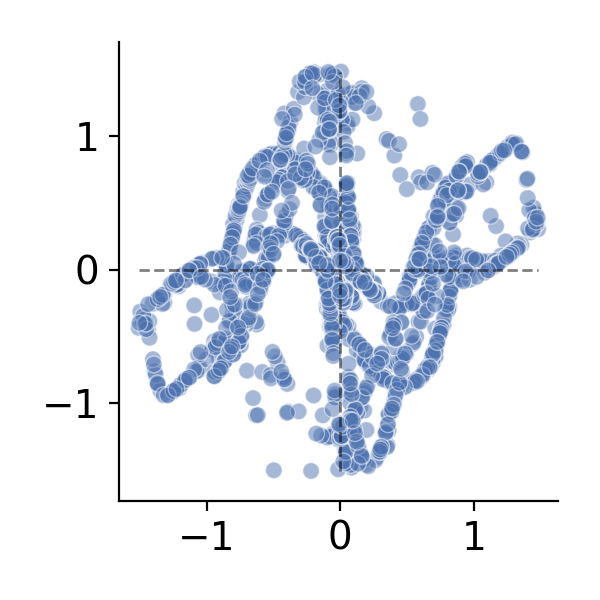

1.5256410256410255


<IPython.core.display.Javascript object>


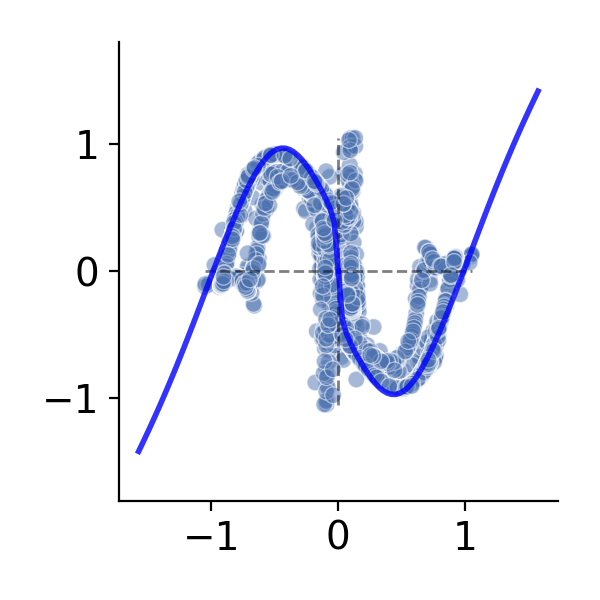

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1.6538461538461535


<IPython.core.display.Javascript object>


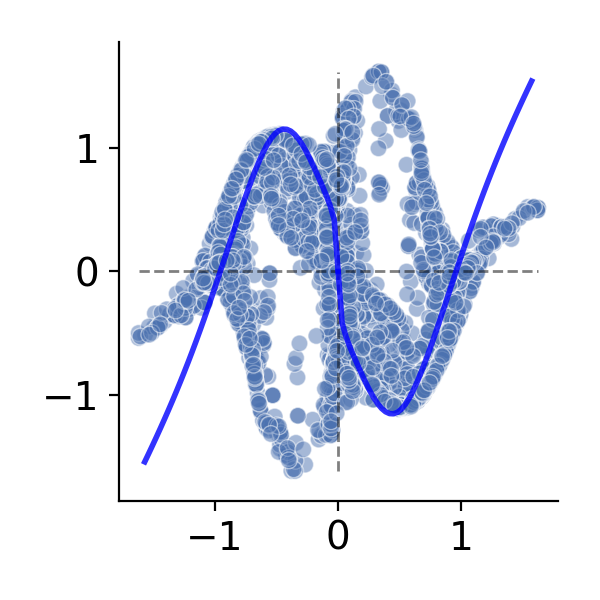

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.2948717948717947


<IPython.core.display.Javascript object>


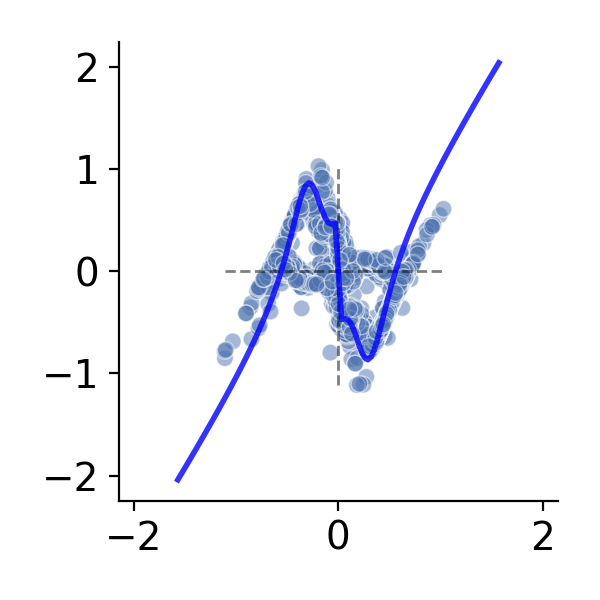

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2.743589743589744


<IPython.core.display.Javascript object>


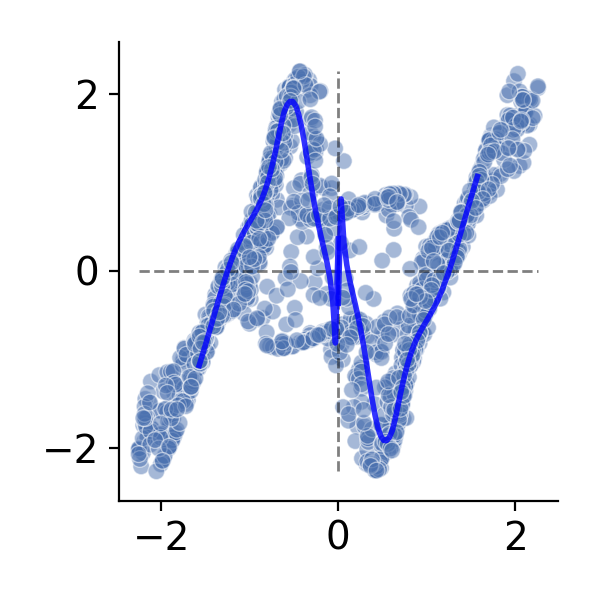

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
# Plot each activity strength separately
save = True
df_ss_prediction = pd.DataFrame({})
parameter_array = np.unique(df_ensemble[parameter])

print(parameter_array)

for parameter_value in parameter_array:
    
    print(parameter_value)
    df_full_sim = df_ensemble.loc[df_ensemble[parameter]==parameter_value]
    
    df_ss_prediction = df_ensemble_predicted.loc[np.round(df_ensemble_predicted[parameter],3)==np.round(parameter_value,3)]
    
  
    
    title = 'Base-Tip Return Map {}'.format(np.round(parameter_value,2))
    plt.figure(figsize=(3,3))
    
    # Plot the full-sim data
    sns.scatterplot(data = df_full_sim,x = 'Base-Tip angle (n)', y = 'Base-Tip angle (n+1)', hue = parameter, 
                    style = parameter, palette = 'deep', alpha = 0.5, legend = False)
    
    angle_min = np.min(df_full_sim['Base-Tip angle (n)'])
    angle_max = np.max(df_full_sim['Base-Tip angle (n)'])
        
    
    df_ss_prediction['-Initial angle (rad)'] = -df_ss_prediction['Initial angle (rad)']
    df_ss_prediction['-Final angle (rad)'] = -df_ss_prediction['Final angle (rad)']
    
    # Plot the single-cycle data
    plt.plot(df_ss_prediction['Initial angle (rad)'], df_ss_prediction['Final angle (rad)'],  color = 'b', alpha = 0.8, linewidth = 2)
    plt.plot(df_ss_prediction['-Initial angle (rad)'], df_ss_prediction['-Final angle (rad)'],  color = 'b', alpha = 0.8, linewidth = 2)

    
    plt.xlabel(None)
    plt.ylabel(None)
    

    diag_line_x = np.linspace(angle_min, angle_max, 20)
    diag_line_y = diag_line_x
    diag_line_y_neg = -diag_line_x

#     ax2 = plt.plot(diag_line_x, diag_line_y, 'k-', linewidth = 1, alpha =0.5)
#     ax2 = plt.plot(diag_line_x, diag_line_y_neg, 'k-', linewidth = 1, alpha =0.5)

    ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--',linewidth = 1, alpha =0.5)
    ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--', linewidth = 1, alpha =0.5)
    
    plt.xlim([angle_min, angle_max])
    plt.axis('equal')
    plt.tight_layout()
#     plt.title(title)
    sns.despine(top=True, right = True)
    
    if(save):

        plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
        plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    plt.show()

## Plot the single-cycle predictions Return maps and Fixed points for particular activity strengths.

### Load the Fixed points data

In [18]:
analysis_type = 'FixedPoints'

# Activity strength sweep
# folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL/FixedPointAnalysis'

# Activity time sweep
folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/ActivityTimeSweep_FINAL/FixedPointAnalysis'

df_fixed_pts = pd.DataFrame({})

for root, dirs, files in os.walk(folder):
    
    for file in files:
        if(analysis_type in file and file.endswith('.csv')):
            
            df = pd.read_csv(os.path.join(root, file))
            
            df_fixed_pts = df_fixed_pts.append(df)

In [19]:
df_fixed_pts

,Unnamed: 0,Fixed point,Slope,type,activity number,activity timescale,dynamics,stability
0,0,0.000000,37.319893,Positive,80.724,500.0,Zero fixed point,unstable
1,0,0.531827,0.188467,Positive,80.724,500.0,1-Period,linearly stable
0,0,0.000000,13.242805,Positive,80.724,700.0,Zero fixed point,unstable
1,0,0.011684,-15.835368,Positive,80.724,700.0,1-Period,unstable
2,0,0.615401,0.450355,Negative,80.724,700.0,2-Period,linearly stable
3,0,0.013059,-15.835410,Negative,80.724,700.0,2-Period,unstable
0,0,0.000000,0.528464,Positive,80.724,300.0,Zero fixed point,linearly stable
1,0,0.106255,1.182502,Positive,80.724,300.0,1-Period,unstable
0,0,0.000000,25.404127,Positive,80.724,475.0,Zero fixed point,unstable
1,0,0.705299,0.417427,Positive,80.724,475.0,1-Period,linearly stable


<IPython.core.display.Javascript object>


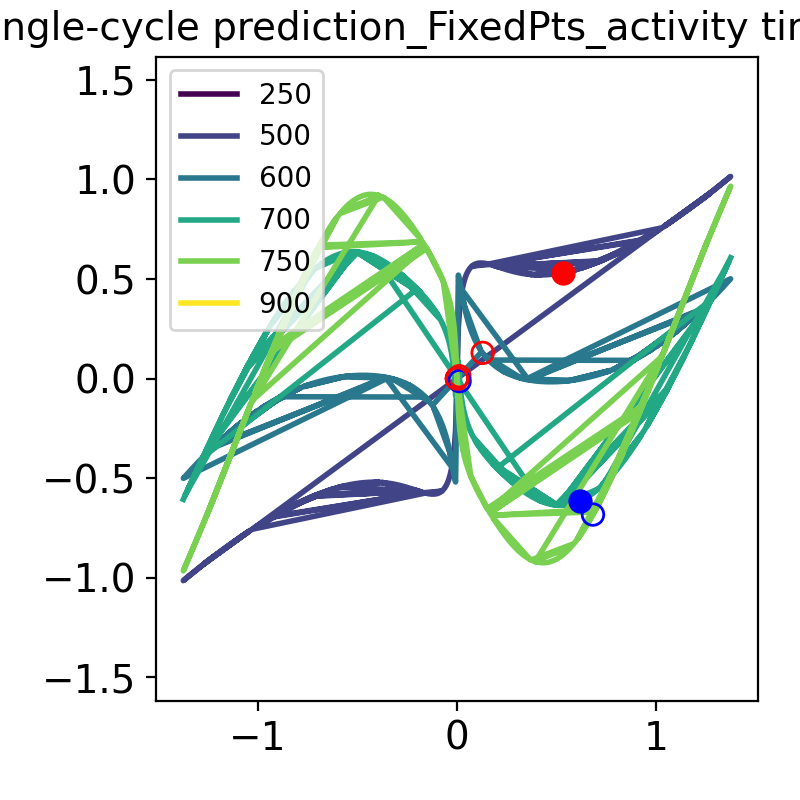

250
0
0
500
200
2
600
200
2
700
200
4
750
200
2
900
0
0


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [20]:
# Activity strength
# parameter_values_to_plot = [0.756, 1.141, 1.526, 2.487, 2.744]

parameter = 'activity timescale'

# parameter_values_to_plot = [40.7, 61.4, 82.1, 133.85, 147.65]

# Activity time sweep
parameter_values_to_plot = [250, 500, 600, 700, 750, 900]

save = False

cmap = plt.cm.get_cmap(plt.cm.viridis, 255)
# cmap = plt.cm.get_cmap(ACTIVITY_STRENGTH_CMAP, 255)

colors = [cmap(ii) for ii in np.linspace(0,1,len(parameter_values_to_plot))]

title = 'Single-cycle prediction_FixedPts_{}'.format(parameter)
plt.figure(figsize=(4,4))

for ii, parameter_value in enumerate(parameter_values_to_plot):
    
    print(parameter_value)
    
    df_ss_prediction = df_ensemble_predicted.loc[np.round(df_ensemble_predicted[parameter],3)==np.round(parameter_value,3)]
    
    print(len(df_ss_prediction))
    
    df_ss_prediction['-Initial angle (rad)'] = -df_ss_prediction['Initial angle (rad)']
    df_ss_prediction['-Final angle (rad)'] = -df_ss_prediction['Final angle (rad)']
    
    # Plot the single-cycle data
    plt.plot(df_ss_prediction['Initial angle (rad)'], df_ss_prediction['Final angle (rad)'],  
             color = colors[ii], alpha = 1, linewidth = 2, label = np.round(parameter_value,2))
    plt.plot(df_ss_prediction['-Initial angle (rad)'], df_ss_prediction['-Final angle (rad)'],  
             color =  colors[ii], alpha = 1, linewidth = 2)

    
    
    # Plot the fixed points
    df_fixed_pts_parameter = df_fixed_pts.loc[np.round(df_fixed_pts[parameter],3)==np.round(parameter_value,3)]
    
    print(len(df_fixed_pts_parameter))
    
    for jj in range(len(df_fixed_pts_parameter)):
        
        fixed_pt = df_fixed_pts_parameter['Fixed point'][jj]
        stability = df_fixed_pts_parameter['stability'][jj]
        fixed_pt_type = df_fixed_pts_parameter['type'][jj]
        
        if(fixed_pt_type=='Positive'):
            y_fixed_pt = fixed_pt
            if(stability == 'linearly stable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o',facecolors='r', edgecolors='r', zorder = 10)
            elif(stability == 'unstable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o', facecolors='none', edgecolors='r', zorder = 10)
        else:
            y_fixed_pt = -fixed_pt
            if(stability == 'linearly stable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o',facecolors='b', edgecolors='b', zorder = 10)
            elif(stability == 'unstable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o', facecolors='none', edgecolors='b', zorder = 10)
            
    angle_min = np.min(df_ss_prediction['Initial angle (rad)'])
    angle_max = np.max(df_ss_prediction['Initial angle (rad)'])

diag_line_x = np.linspace(-angle_max, angle_max, 20)
diag_line_y = diag_line_x
diag_line_y_neg = -diag_line_x

ax2 = plt.plot(diag_line_x, diag_line_y, 'k--', linewidth = 1, alpha =0.5)
ax2 = plt.plot(diag_line_x, diag_line_y_neg, 'k--', linewidth = 1, alpha =0.5)

ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '-',linewidth = 1, alpha =0.5, )
ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '-', linewidth = 1, alpha =0.5)

plt.axis('equal')
plt.tight_layout()
plt.title(title)
plt.legend()
if(save):

    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()

## Plots near high activity values

<IPython.core.display.Javascript object>


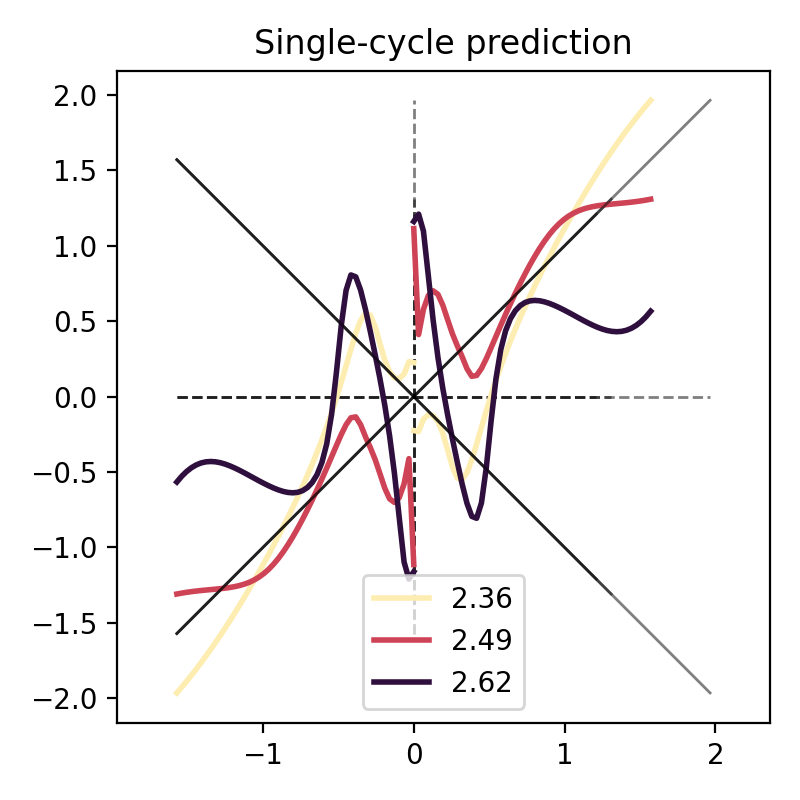

2.359
2.487
2.615


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [76]:
parameter_values_to_plot = [2.359, 2.487, 2.615]

cmap = plt.cm.get_cmap(ACTIVITY_STRENGTH_CMAP, 255)
colors = [cmap(ii) for ii in np.linspace(0,1,len(parameter_values_to_plot))]

title = 'Single-cycle prediction'
plt.figure(figsize=(4,4))

for ii, parameter_value in enumerate(parameter_values_to_plot):
    
    print(parameter_value)
    
    df_ss_prediction = df_ensemble_predicted.loc[np.round(df_ensemble_predicted[parameter],3)==np.round(parameter_value,3)]
    
    df_ss_prediction['-Initial angle (rad)'] = -df_ss_prediction['Initial angle (rad)']
    df_ss_prediction['-Final angle (rad)'] = -df_ss_prediction['Final angle (rad)']
    
    # Plot the single-cycle data
    plt.plot(df_ss_prediction['Initial angle (rad)'], df_ss_prediction['Final angle (rad)'],  color = colors[ii], alpha = 1, linewidth = 2, label = np.round(parameter_value,2))
    plt.plot(df_ss_prediction['-Initial angle (rad)'], df_ss_prediction['-Final angle (rad)'],  color =  colors[ii], alpha = 1, linewidth = 2)

    
    angle_min = np.min(df_ss_prediction['-Initial angle (rad)'])
    angle_max = np.max(df_ss_prediction['Final angle (rad)'])

    diag_line_x = np.linspace(angle_min, angle_max, 20)
    diag_line_y = diag_line_x
    diag_line_y_neg = -diag_line_x

    ax2 = plt.plot(diag_line_x, diag_line_y, 'k-', linewidth = 1, alpha =0.5)
    ax2 = plt.plot(diag_line_x, diag_line_y_neg, 'k-', linewidth = 1, alpha =0.5)

    ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--',linewidth = 1, alpha =0.5)
    ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--', linewidth = 1, alpha =0.5)
    
    plt.axis('equal')
    plt.tight_layout()
    plt.title(title)
    plt.legend()